In [1]:
# ============================================================
# PCA on California Housing Dataset (Google Colab Version)
# ============================================================

# Step 1: Upload the dataset to Google Colab
from google.colab import files
import io
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
# ------------------------------------------
# Upload CSV file from your computer
# ------------------------------------------
uploaded = files.upload()
filename = list(uploaded.keys())[0]  # get uploaded filename
data = pd.read_csv(io.BytesIO(uploaded[filename]))

print("File uploaded successfully!")
print(f"Dataset shape: {data.shape}")
print("Columns:", list(data.columns))

Saving californiahousing.csv to californiahousing.csv
File uploaded successfully!
Dataset shape: (20640, 10)
Columns: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity']


In [3]:
# ----------------------------------------------
# Step 2: Handle missing values
# ----------------------------------------------
print("\nChecking for missing values...")
print(data.isnull().sum())

# Fill missing numeric values with the mean of their column
data = data.fillna(data.mean(numeric_only=True))

print("\nMissing values handled (filled with column means).")


Checking for missing values...
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Missing values handled (filled with column means).


In [4]:
# ----------------------------------------------
# Step 3: Handle categorical data (ocean_proximity)
# ----------------------------------------------
# Convert the 'ocean_proximity' column (text) into numeric form
# using one-hot encoding (it creates separate columns for each category)
data_encoded = pd.get_dummies(data, columns=['ocean_proximity'], drop_first=True)

# Use the following 2 lines if you want to see 0 and 1 in the DataFrame instead of False/True. Convert only dummy columns to int
dummy_cols = data_encoded.columns[data_encoded.dtypes == 'bool']
data_encoded[dummy_cols] = data_encoded[dummy_cols].astype(int)

# Check dataframe now
data_encoded.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,0,0,1,0


In [5]:
# ----------------------------------------------
# Step 4: Standardize numeric columns (Standardization)
# ----------------------------------------------
# Subtract mean and divide by standard deviation
data_scaled_df = (data_encoded - data_encoded.mean()) / data_encoded.std()

# Check the result
data_scaled_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-1.327803,1.052523,0.982119,-0.804800,-0.975204,-0.974405,-0.977009,2.344709,2.129580,-0.681873,-0.015566,2.830673,-0.384457
1,-1.322812,1.043159,-0.607004,2.045841,1.355055,0.861418,1.669921,2.332181,1.314124,-0.681873,-0.015566,2.830673,-0.384457
2,-1.332794,1.038478,1.856137,-0.535733,-0.829712,-0.820757,-0.843616,1.782656,1.258663,-0.681873,-0.015566,2.830673,-0.384457
3,-1.337785,1.038478,1.856137,-0.624199,-0.722382,-0.766010,-0.733764,0.932945,1.165072,-0.681873,-0.015566,2.830673,-0.384457
4,-1.337785,1.038478,1.856137,-0.462393,-0.615052,-0.759828,-0.629142,-0.012881,1.172871,-0.681873,-0.015566,2.830673,-0.384457


In [6]:
# ----------------------------------------------
# Step 5: Split into train and test subsets
# ----------------------------------------------
train_data, test_data = train_test_split(data_scaled_df, test_size=0.2, random_state=42)

print(f"\nTraining data shape: {train_data.shape}")
print(f"Testing data shape: {test_data.shape}")



Training data shape: (16512, 13)
Testing data shape: (4128, 13)


In [7]:
# ------------------------------------------
# Step 6: Perform PCA
# ------------------------------------------
pca = PCA()
pca.fit(train_data)

# Transform both train and test sets
train_pca = pca.transform(train_data)
test_pca = pca.transform(test_data)


In [8]:
# ------------------------------------------
# Step 7: Show explained variance
# ------------------------------------------
explained_variance = pca.explained_variance_ratio_
cum_explained_variance = np.cumsum(explained_variance)

print("\nExplained Variance Ratio (first 10 PCs):")
for i, var in enumerate(explained_variance[:10]):
    print(f"PC{i+1}: {var:.4f}")


📊 Explained Variance Ratio (first 10 PCs):
PC1: 0.3010
PC2: 0.1759
PC3: 0.1630
PC4: 0.0927
PC5: 0.0772
PC6: 0.0743
PC7: 0.0466
PC8: 0.0322
PC9: 0.0200
PC10: 0.0098


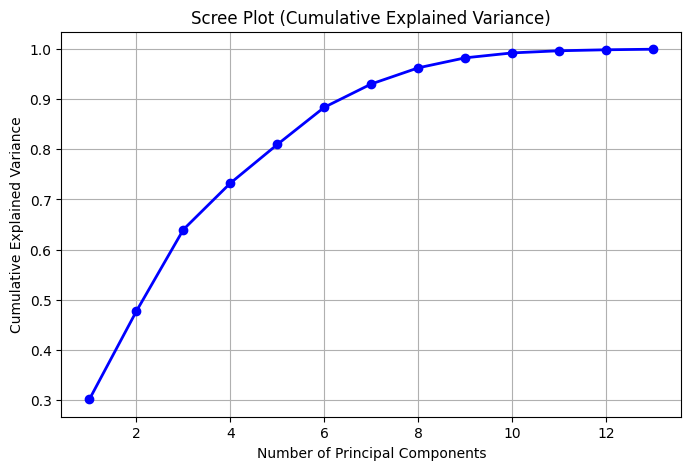

In [10]:
# ------------------------------------------
# Step 8: Scree Plot
# ------------------------------------------
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance)+1), cum_explained_variance, 'bo-', linewidth=2)
plt.title('Scree Plot (Cumulative Explained Variance)')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [11]:
# ------------------------------------------
# Step 9: Choose top components (optional)
# ------------------------------------------
# You can select components that explain, e.g., 95% variance:
n_components_95 = np.argmax(cum_explained_variance >= 0.95) + 1
print(f"\n Number of components explaining 95% variance: {n_components_95}")


✅ Number of components explaining 95% variance: 8


In [14]:
# ------------------------------------------
# Step 10: Save PCA Loadings with Attribute Names (sorted)

# Loadings = eigenvectors * sqrt(eigenvalues)
# They show how strongly each feature influences each principal component.
# ------------------------------------------
# Create loadings DataFrame
loadings_df = pd.DataFrame(
    pca.components_[:n_components_95].T,
    columns=[f'PC{i+1}' for i in range(n_components_95)],
    index=train_data.columns
)

# Reset index to show attribute names as a column
loadings_df.reset_index(inplace=True)
loadings_df.rename(columns={'index': 'Attribute'}, inplace=True)

# Sort by absolute loading strength for the first principal component (PC1) — or change to any PC
sorted_loadings = loadings_df.reindex(
    loadings_df['PC1'].abs().sort_values(ascending=False).index
)

# Save both unsorted and sorted loadings
loadings_df.to_csv('pca_loadings_unsorted.csv', index=False)
sorted_loadings.to_csv('pca_loadings_sorted_PC1.csv', index=False)

# Download from Colab
from google.colab import files
files.download('pca_loadings_sorted_PC1.csv')

print("\nPCA loadings sorted by strongest contributors to PC1 and saved successfully!")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


PCA loadings sorted by strongest contributors to PC1 and saved successfully!



 PCA Explained Variance on Test Data:
     PC  Explained_Variance_Ratio  Cumulative_Explained_Variance
0   PC1                  0.302387                       0.302387
1   PC2                  0.174269                       0.476656
2   PC3                  0.160026                       0.636682
3   PC4                  0.089770                       0.726452
4   PC5                  0.078001                       0.804453
5   PC6                  0.078552                       0.883004
6   PC7                  0.045340                       0.928344
7   PC8                  0.030451                       0.958795
8   PC9                  0.020595                       0.979390
9  PC10                  0.010676                       0.990066


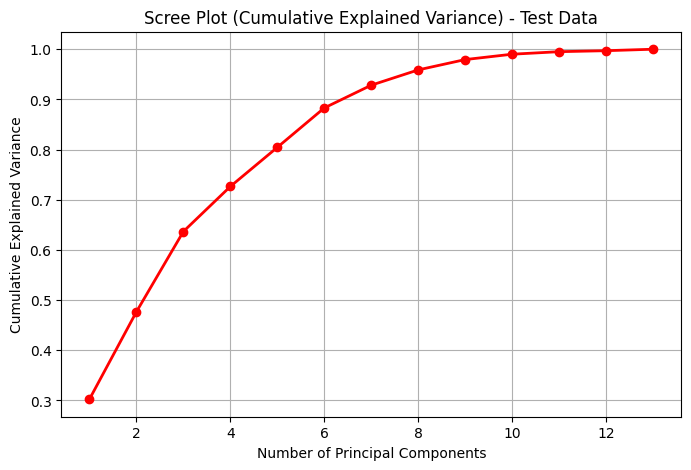

In [16]:
# STEP 11: Model Evaluation
# Compute variance of each principal component in test data

# axis = 0 means, compute variance column-wise i.e., compute variance of each PC across all observations
test_pc_variance = np.var(test_pca, axis=0)

# Compute fraction of total variance explained
test_explained_variance_ratio = test_pc_variance / np.sum(np.var(test_data, axis=0))
test_cum_variance = np.cumsum(test_explained_variance_ratio)

#  Display results
explained_df = pd.DataFrame({
    'PC': [f'PC{i+1}' for i in range(len(test_explained_variance_ratio))],
    'Explained_Variance_Ratio': test_explained_variance_ratio,
    'Cumulative_Explained_Variance': test_cum_variance
})

print("\n PCA Explained Variance on Test Data:")
print(explained_df.head(10))  # show first 10 PCs

# Optional: Scree plot


plt.figure(figsize=(8,5))
plt.plot(range(1, len(test_cum_variance)+1), test_cum_variance, 'ro-', linewidth=2)
plt.title('Scree Plot (Cumulative Explained Variance) - Test Data')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()